In [1]:
import os
os.chdir("C:\\Users\\Shankii\\Desktop\\kaglle\\iris dataset")

In [2]:
import pandas as pd
import numpy as np
import math
import quandl
import scipy
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
from scipy.stats import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import binarize
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [3]:
iris=pd.read_csv("Iris.csv")

In [4]:
iris.isnull().sum()
## no null values in data set

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
iris.info()

## species data is of  object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.drop("Id",axis=1,inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris.describe()

## outliers are not seen here
## so need of removing the outliers

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# HEAT MAP

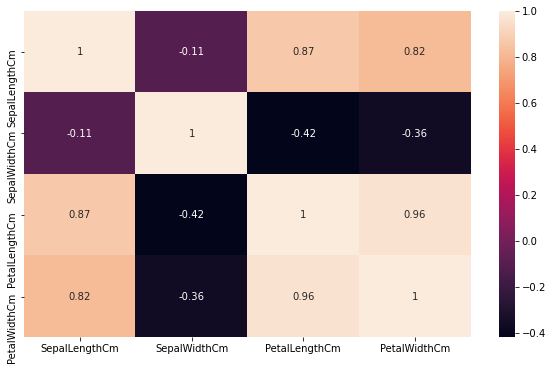

In [8]:

## lets see the corekation between the variables of the data with species

corr=iris.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)


## sepal-width with petal-width and petal-length are not closely related to each other 
## because of negative corelation factor between them as seen from heatmap

#  PIE-CHART

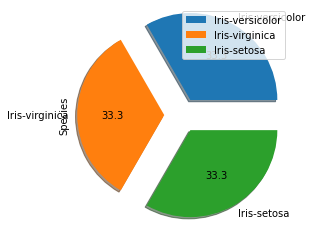

In [9]:
iris['Species'].value_counts().plot.pie(explode=[0.2,0.2,0.2],shadow=True,autopct='%1.1f').legend()

# Jointplot

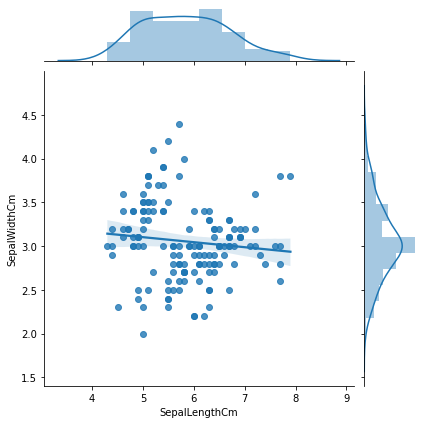

In [10]:
sns.jointplot("SepalLengthCm", "SepalWidthCm", data=iris, kind="reg")

## using linear regression fit

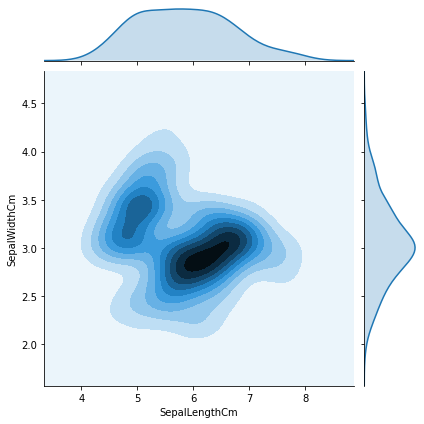

In [11]:
sns.jointplot("SepalLengthCm", "SepalWidthCm", data=iris, kind="kde")


# FACETGRID

C:\Users\Shankii\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


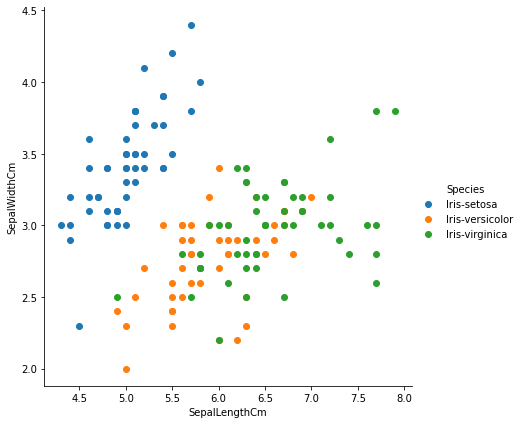

In [12]:
## combining many graphs with some constraints in one graph using sns.FacetGrid

sns.FacetGrid(iris,hue='Species',size=6).map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()

# BOXPLOT

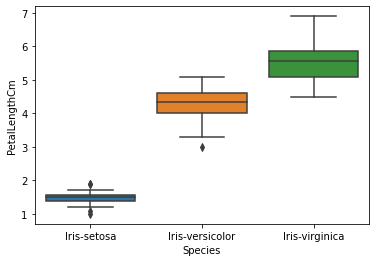

In [13]:
### lest see using box plot for PETAL-LENGTH 


sns.boxplot(y='PetalLengthCm',x='Species',data=iris)


## setosa has sallest petal-length
## virginica has longest petal-length

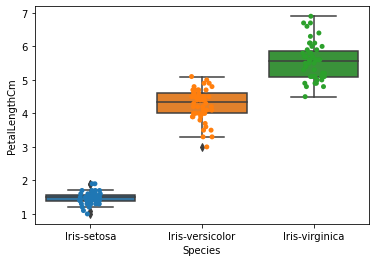

In [14]:
## lest overlap the actual plot with the box plot for species vs petal-lenght

graph=sns.boxplot(y='PetalLengthCm',x='Species',data=iris)
graph=sns.stripplot(y='PetalLengthCm',x='Species',data=iris,jitter=True)


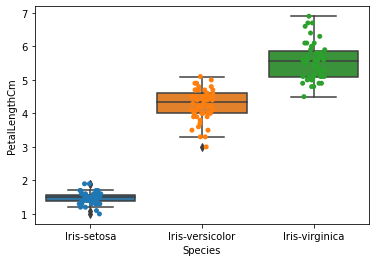

In [15]:
graph=sns.boxplot(y='PetalLengthCm',x='Species',data=iris)
graph=sns.stripplot(y='PetalLengthCm',x='Species',data=iris,jitter=True,dodge=True)


## when dodged set to True :
 ## some points on same hue level will be dodged

# violin plot

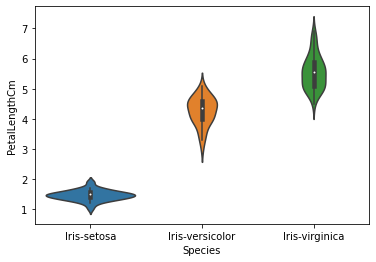

In [16]:

## better than box plot since more values at same level will lead to fatter or denser area at that level
## peak represents the highest point (max point) in violin plot


sns.violinplot(y='PetalLengthCm',x='Species',data=iris)


## it is clear that species veriscolor and virginica have some common points and setosa has no point in common

C:\Users\Shankii\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


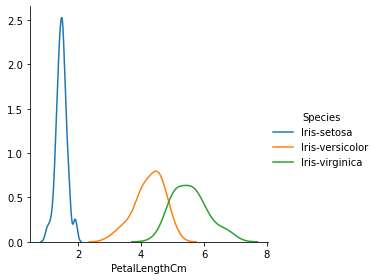

In [17]:
## lets see the relationship between species type wrto petal length

# ## we will use KDE for that
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset.
# KDE represents the data using a continuous probability density curve in one or more dimensions.



sns.FacetGrid(iris,hue='Species',size=4).map(sns.kdeplot,'PetalLengthCm').add_legend()

## clearly therse no single relationship between setosa and other 2 categories

# PAIRPLOT

C:\Users\Shankii\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


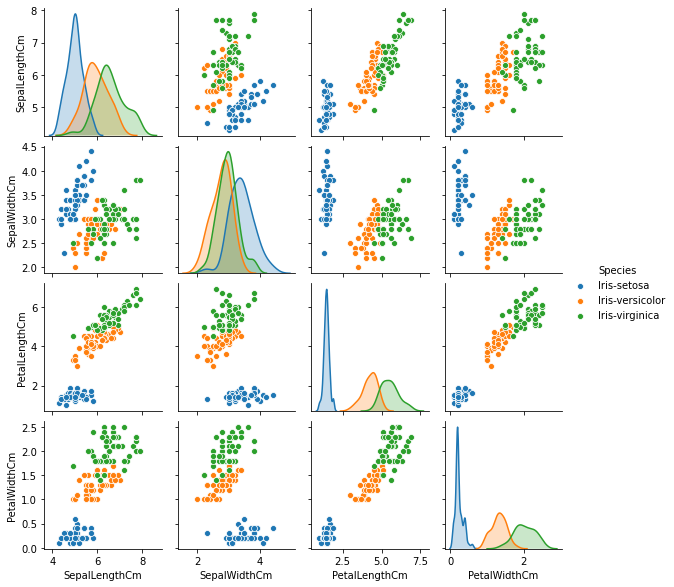

In [18]:
## lets see the relationship between all the variables

sns.pairplot(iris,hue='Species',diag_kind='kde',size=2)


## setosa species has no relationship with other two in petal length and width type

# MATRIX PLOT

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001928DC9A6D0>,
      dtype=object)

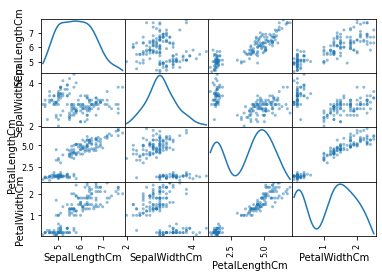

In [19]:
scatter_matrix(iris,diagonal='kde')

# BOX PLOT

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001928F177BB0>,
      dtype=object)

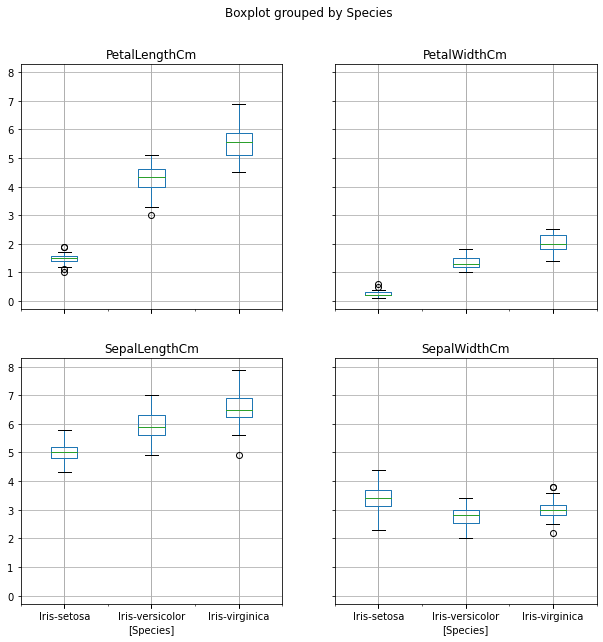

In [20]:
## lets see the box plot

iris.boxplot(by='Species',figsize=(10,10))

# ANDREWS CURVE 

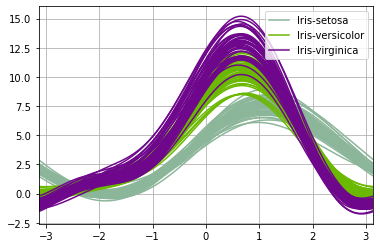

In [21]:
## lets use andrews curve so as to plot the high dimension curve
## finds the fourier coeff and plots them


pd.plotting.andrews_curves(iris,'Species',)

# RADVIZ PLOT

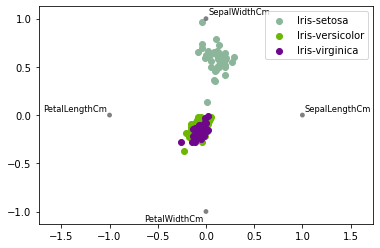

In [22]:
# ## lets see using another function radviz
# Each Series in the DataFrame is represented as a evenly distributed slice on a circle.
# Each data point is rendered in the circle according to the value on each Series.
# Highly correlated Series in the DataFrame are placed closer on the unit circle.


pd.plotting.radviz(iris,'Species')

In [23]:
## PEDICTION ALGORITHMS

In [24]:
x=iris.drop('Species',axis=1)
y=iris['Species']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=6)

# K-Neighbour Classification

In [25]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred1=knn.predict(xtest)

print(classification_report(ytest,ypred1))
print(confusion_matrix(ytest,ypred1))


print(" accuracy of knn model is ",accuracy_score(ytest,ypred1))

## 96.666 % accuracy

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

[[ 9  0  0]
 [ 0  9  1]
 [ 0  0 11]]
 accuracy of knn model is  0.9666666666666667


# Logistic Regression

In [26]:
logit=LogisticRegression()
logit.fit(xtrain,ytrain)
ypred2=logit.predict(xtest)
print('accuracy is ', accuracy_score(ytest,ypred2))

print(classification_report(ytest,ypred2))
print(confusion_matrix(ytest,ypred2))

accuracy is  0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

[[ 9  0  0]
 [ 0 10  0]
 [ 0  1 10]]


# SUPPORT VECTOR MACHINE

In [31]:
model=SVC()
model.fit(xtrain,ytrain)
ypred3=model.predict(xtest)

print(classification_report(ytest,ypred3))
print(confusion_matrix(ytest,ypred3))


print('accuracy is ' , accuracy_score(ytest,ypred3))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[ 9  0  0]
 [ 0 10  0]
 [ 0  0 11]]
accuracy is  1.0


# NAIVE BAYES

In [32]:
model=GaussianNB()
model.fit(xtrain,ytrain)
ypred4=model.predict(xtest)

print(classification_report(ytest,ypred4))
print(confusion_matrix(ytest,ypred4))


print(' accuracy is ', accuracy_score(ytest,ypred4))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30

[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]
 accuracy is  0.9333333333333333


# DECISION TREE

In [33]:
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
ypred5=model.predict(xtest)


print(classification_report(ypred5,ytest))
print(confusion_matrix(ypred5,ytest))


print('confusion matrix is ', accuracy_score(ytest,ypred5))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.95      0.93      0.93        30

[[ 9  0  0]
 [ 0 10  2]
 [ 0  0  9]]
confusion matrix is  0.9333333333333333


# RANDOM FOREST

In [34]:
## RANDOM FOREST

model=RandomForestClassifier()
model.fit(xtrain,ytrain)
ypred6=model.predict(xtest)

print(classification_report(ytest,ypred6))
print(confusion_matrix(ytest,ypred6))


print('accuracy is ', accuracy_score(ytest,ypred6))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30

[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]
accuracy is  0.9333333333333333
